In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("D:\marketing_data.csv")

In [4]:
data

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [51]:
data.shape

(4572, 5)

In [5]:
data.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [6]:
data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [7]:
df=data.dropna()

In [8]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [9]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [10]:
df.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.869158,0.527687,0.999497
Radio,0.869158,1.000000,0.606338,0.868638
Social Media,0.527687,0.606338,1.000000,0.527446
Sales,0.999497,0.868638,0.527446,1.000000


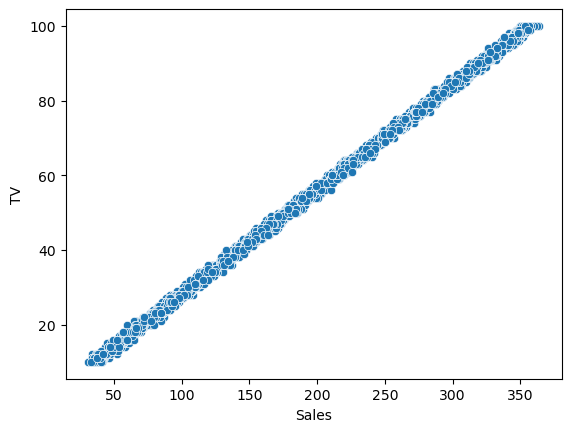

In [11]:
sns.scatterplot(data = df, x = 'Sales', y = 'TV')
plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
df['Influencer']=le.fit_transform(df.Influencer)

C:\Users\sadan\AppData\Local\Temp\ipykernel_9984\1416344962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Influencer']=le.fit_transform(df.Influencer)


In [ ]:
#Here, for Influencer column Nano=0 ,Micro=1,Mega=2,macro=3

In [14]:
df   

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,1,54.732757
1,13.0,9.237765,2.409567,1,46.677897
2,41.0,15.886446,2.913410,1,150.177829
3,83.0,30.020028,6.922304,1,298.246340
4,15.0,8.437408,1.405998,2,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,2,94.685866
4568,71.0,20.610685,6.545573,3,249.101915
4569,44.0,19.800072,5.096192,2,163.631457
4570,71.0,17.534640,1.940873,0,253.610411


In [15]:
import statsmodels.api as sm

y=df[['Sales']]
x=df[['TV','Radio','Social Media','Influencer']].assign(const=1)

model=sm.OLS(y,x)
results=model.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.129e+06
Date:                Thu, 18 Apr 2024   Prob (F-statistic):               0.00
Time:                        21:07:39   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4541   BIC:                         2.277e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
TV               3.5625      0.003   1051.017   

In [16]:
from sklearn import linear_model

In [18]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression()

In [21]:
print(regr.coef_)

[[ 3.56254721 -0.00390797  0.00463474 -0.02915622  0.        ]]


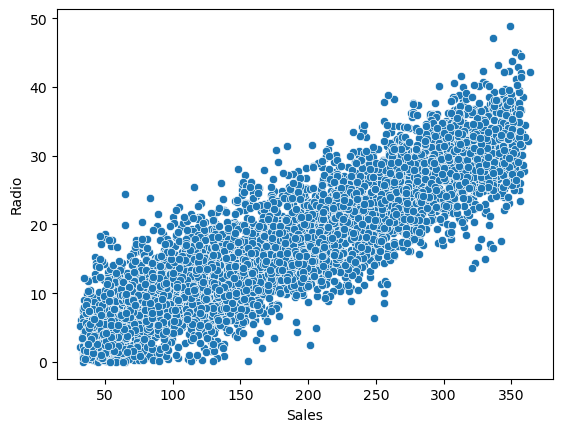

In [22]:
import seaborn as sns
sns.scatterplot(data = df, x = 'Sales', y = 'Radio')
plt.show()

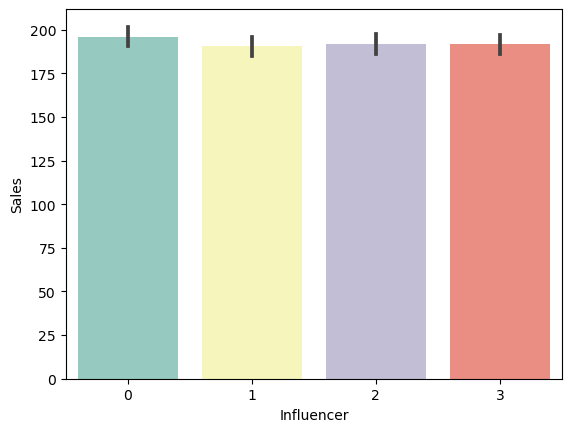

In [23]:
sns.barplot(data=df, x='Influencer', y='Sales', palette = 'Set3')
plt.show()

In [24]:
print(df.groupby('Influencer')['Sales'].mean())

Influencer
0    196.066150
1    190.412908
2    191.578370
3    191.708827
Name: Sales, dtype: float64


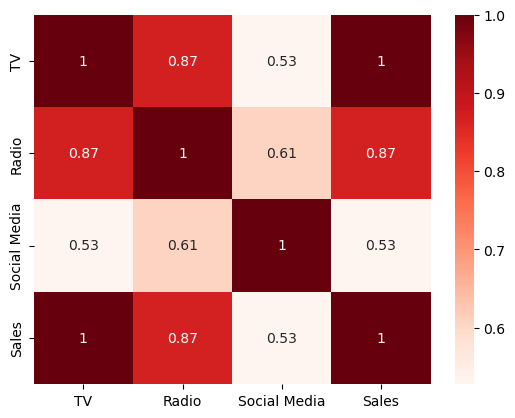

In [25]:
df1 = df.drop('Influencer', axis = 1)
sns.heatmap(data=df1.corr(), annot=True, cmap='Reds')
plt.show()

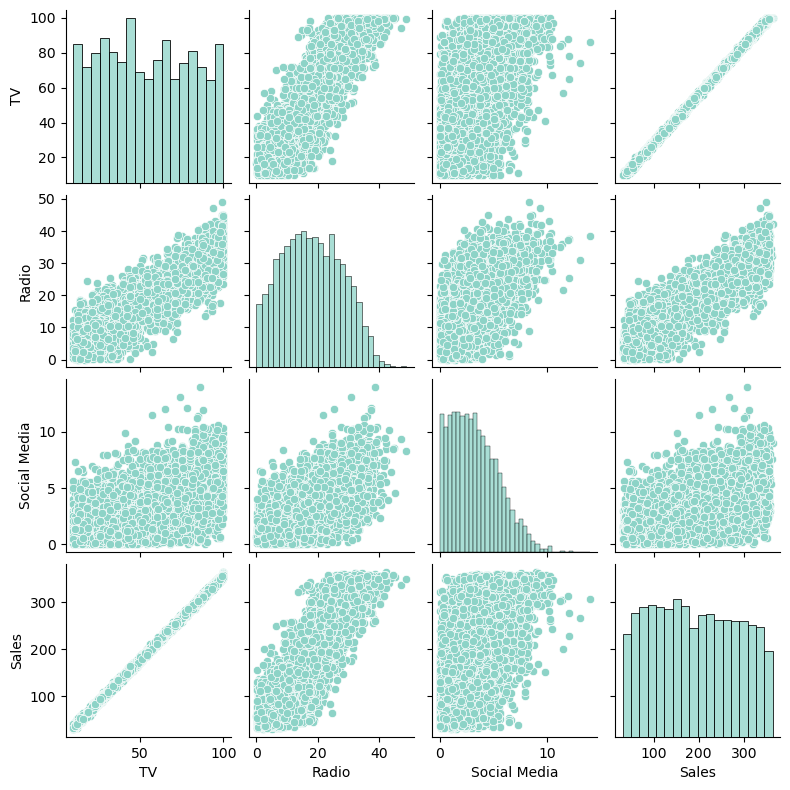

In [26]:
# Select the numeric columns for the pair plot
numeric_columns =['TV', 'Radio', 'Social Media', 'Sales']

# Set the color palette to a consistent one (optional)
sns.set_palette("Set3")

# Create a pair plot for the numeric variables
sns.pairplot(data=df[numeric_columns], height=2)
plt.show()

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = df[['TV','Radio','Social Media','Influencer']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

        feature        VIF
0            TV  19.297930
1         Radio  21.142618
2  Social Media   4.996448
3    Influencer   2.099977


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = df[['TV','Social Media','Influencer']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

        feature       VIF
0            TV  5.092262
1  Social Media  4.364003
2    Influencer  2.099923


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
X = df[['Radio','Social Media','Influencer']]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

        feature       VIF
0         Radio  5.579031
1  Social Media  4.976068
2    Influencer  2.020278


In [30]:
from sklearn.model_selection import train_test_split

x=np.array(df[['TV','Radio','Social Media','Influencer']]) #independent
y=np.array(df[['Sales']])


x_train, x_test, y_train, y_test1=train_test_split(x,y,test_size=0.20,random_state=42)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


ridge = Ridge(alpha=1.0) 
ridge.fit(X_train_scaled, y_train)

# 5. Evaluate the model
y_pred = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 8.319931682657574


In [32]:
from sklearn.model_selection import train_test_split

x=np.array(df[['TV','Radio','Social Media','Influencer']]) #independent
y=np.array(df[['Sales']])


x_train, x_test, y_train, y_test1=train_test_split(x,y,test_size=0.20,random_state=42)

In [33]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [35]:
r_sq = model.score(x_train, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = model.predict(x_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.9989911802100335
R^2: 0.9989911802100335
MAE: 2.3781001199808274
MSE: 8.787361293143963
RMSE: 2.9643483758060496


In [36]:
r_sq_test = model.score(x_test, y_test1)
print('Coefficient of determination:', r_sq_test)

y_pred_test1 = model.predict(x_test)

Coefficient of determination: 0.9990104455954855


In [37]:
r_sq_test = model.score(x_test, y_test1)
print('Coefficient of determination:', r_sq_test)
y_pred_test1 = model.predict(x_test)
print('R^2:', r2_score(y_test1, y_pred_test1))
print('MAE:', mean_absolute_error(y_test1,y_pred_test1))
print('MSE:', mean_squared_error(y_test1, y_pred_test1))
print('RMSE:',np.sqrt(mean_squared_error(y_test1, y_pred_test1)))

Coefficient of determination: 0.9990104455954855
R^2: 0.9990104455954855
MAE: 2.3123467673508276
MSE: 8.322554810592827
RMSE: 2.884883846984628


In [38]:
residuals=y_test1-y_pred_test1
results={'actual':y_test1.ravel(),'predicted':y_pred_test1.ravel(),'residuals':residuals.ravel()}
results=pd.DataFrame(results)
results

,actual,predicted,residuals
0,55.261284,53.239554,2.021731
1,67.574904,71.076071,-3.501168
2,272.250108,267.012023,5.238085
3,195.102176,195.758863,-0.656687
4,273.960377,273.979955,-0.019578
...,...,...,...
905,275.427755,270.526575,4.901180
906,242.253505,245.647237,-3.393732
907,139.344661,135.145828,4.198832
908,313.657339,313.326192,0.331147


Text(0.5, 1.0, 'Actual vs. predicted')

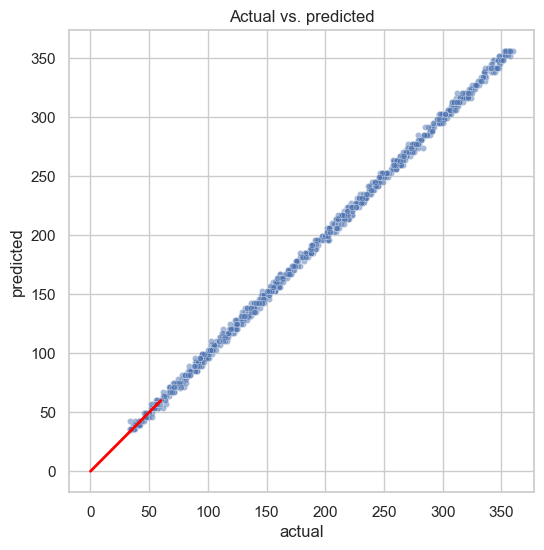

In [40]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual', y='predicted', data=results,
                s=20,
                alpha=0.5,
                ax=ax)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted')

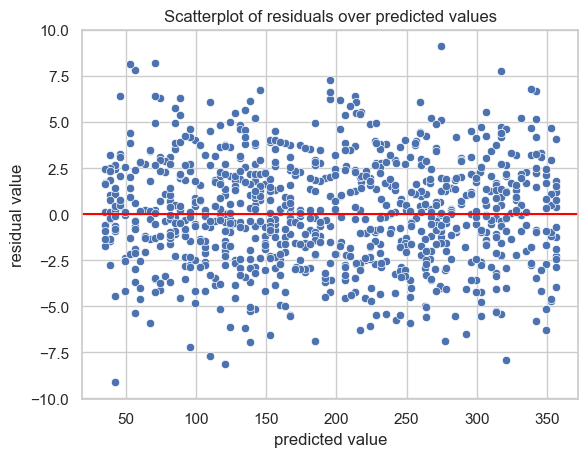

In [41]:
sns.scatterplot(x='predicted', y='residuals', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split  # Removing Radio

x1=np.array(df[['TV','Social Media','Influencer']]) #independent
y=np.array(df[['Sales']])


x_train, x_test, y_train, y_test2=train_test_split(x1,y,test_size=0.20,random_state=42)

In [46]:
len(x_train)

3636

In [48]:
len(x_test)

910

In [43]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
r_sq = model.score(x_train, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = model.predict(x_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.9989911646888614
R^2: 0.9989911646888614
MAE: 2.378150882243123
MSE: 8.787496490874975
RMSE: 2.964371179672845


In [45]:
r_sq_test = model.score(x_test, y_test2)
print('Coefficient of determination:', r_sq_test)

y_pred_test2 = model.predict(x_test)

Coefficient of determination: 0.9990103459181142


In [46]:
r_sq_test = model.score(x_test, y_test2)
print('Coefficient of determination:', r_sq_test)
y_pred_test2 = model.predict(x_test)
print('R^2:', r2_score(y_test2, y_pred_test2))
print('MAE:', mean_absolute_error(y_test2,y_pred_test2))
print('MSE:', mean_squared_error(y_test2, y_pred_test2))
print('RMSE:',np.sqrt(mean_squared_error(y_test2, y_pred_test2)))

Coefficient of determination: 0.9990103459181142
R^2: 0.9990103459181142
MAE: 2.3124869803240715
MSE: 8.323393137806123
RMSE: 2.885029139853898


In [47]:
residuals=y_test2-y_pred_test2
results={'actual':y_test2.ravel(),'predicted':y_pred_test2.ravel(),'residuals':residuals.ravel()}
results=pd.DataFrame(results)
results

,actual,predicted,residuals
0,55.261284,53.232276,2.029008
1,67.574904,71.075545,-3.500641
2,272.250108,267.007094,5.243014
3,195.102176,195.764473,-0.662297
4,273.960377,273.987649,-0.027271
...,...,...,...
905,275.427755,270.534898,4.892856
906,242.253505,245.647816,-3.394310
907,139.344661,135.148725,4.195935
908,313.657339,313.315567,0.341773


Text(0.5, 1.0, 'Actual vs. predicted')

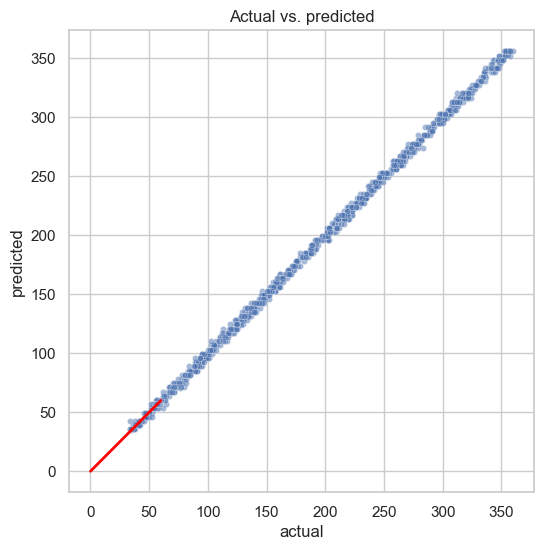

In [48]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual', y='predicted', data=results,
                s=20,
                alpha=0.5,
                ax=ax)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted')

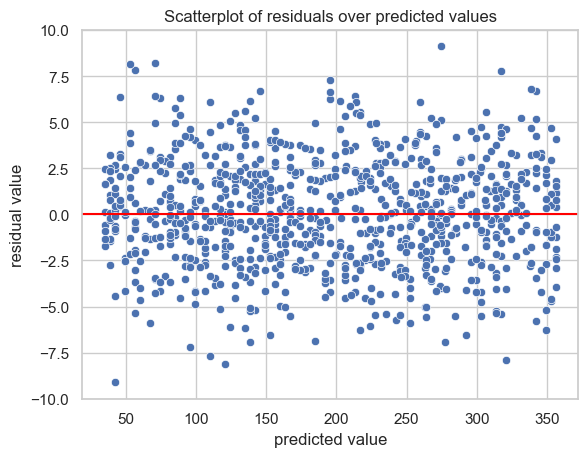

In [49]:
sns.scatterplot(x='predicted', y='residuals', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split  #Removing 

x2=np.array(df[['Radio','Social Media','Influencer']]) #independent
y=np.array(df[['Sales']])


x_train, x_test, y_train, y_test3=train_test_split(x2,y,test_size=0.20,random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [53]:
r_sq = model.score(x_train, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = model.predict(x_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.7540114525245514
R^2: 0.7540114525245514
MAE: 36.91839409444993
MSE: 2142.6921459523282
RMSE: 46.28922278405988


In [54]:
r_sq_test = model.score(x_test, y_test3)
print('Coefficient of determination:', r_sq_test)

y_pred_test3 = model.predict(x_test)

Coefficient of determination: 0.7564554209323258


In [55]:
r_sq_test = model.score(x_test, y_test3)
print('Coefficient of determination:', r_sq_test)
y_pred_test3 = model.predict(x_test)
print('R^2:', r2_score(y_test3, y_pred_test3))
print('MAE:', mean_absolute_error(y_test3,y_pred_test3))
print('MSE:', mean_squared_error(y_test3, y_pred_test3))
print('RMSE:',np.sqrt(mean_squared_error(y_test3, y_pred_test3)))

Coefficient of determination: 0.7564554209323258
R^2: 0.7564554209323258
MAE: 36.205199365038474
MSE: 2048.308914463325
RMSE: 45.25824692211713


In [56]:
residuals=y_test3 - y_pred_test3
results={'actual':y_test3.ravel(),'predicted':y_pred_test3.ravel(),'residuals':residuals.ravel()}
results=pd.DataFrame(results)
results

,actual,predicted,residuals
0,55.261284,68.814848,-13.553563
1,67.574904,104.813561,-37.238658
2,272.250108,209.799839,62.450269
3,195.102176,208.307361,-13.205185
4,273.960377,304.247135,-30.286758
...,...,...,...
905,275.427755,270.586492,4.841263
906,242.253505,206.085523,36.167982
907,139.344661,166.532698,-27.188038
908,313.657339,256.407902,57.249437


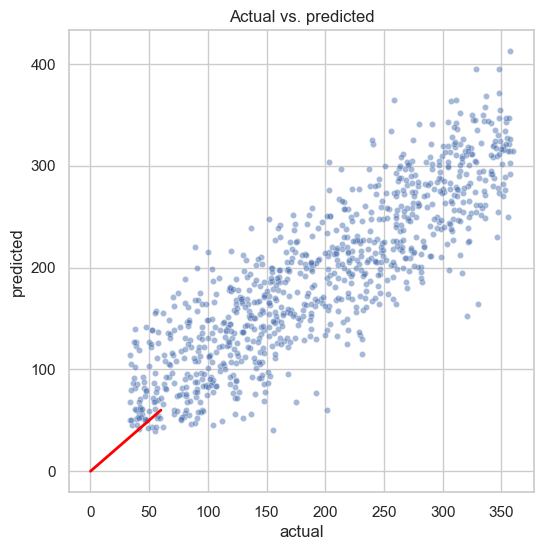

In [52]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual', y='predicted', data=results,
                s=20,
                alpha=0.5,
                ax=ax)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

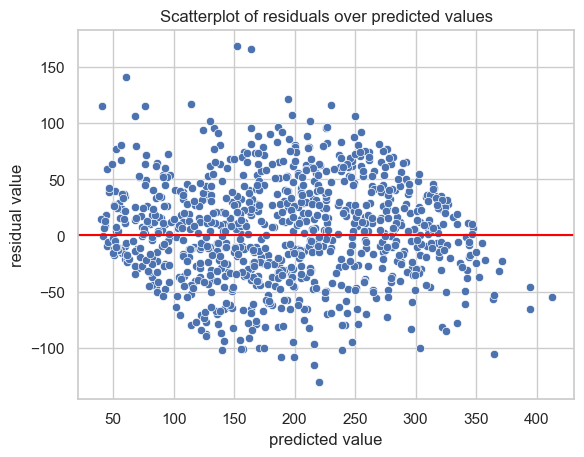

In [57]:
sns.scatterplot(x='predicted', y='residuals', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()